In [2]:
# Importing Necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('datasets/headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [ ]:
Our dataset has no categorical values we can move forward.
we don't have any null values in our dataset.

In [5]:
# Taking x and y variables
X = df['Head Size(cm^3)'].values
Y =  df['Brain Weight(grams)'].values

# METHOD - 1

In [9]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

n = len(X)

num =0
denom = 0

for i in range(n):
    num += (X[i]-mean_X)* (Y[i]-mean_Y)
    denom +=(X[i]-mean_X)**2
m = num/denom
c = mean_Y - (m*mean_X)

print(m,',',c)

0.26342933948939945 , 325.57342104944223


In [ ]:
Here , we calculate m and b. Now we need to find the line

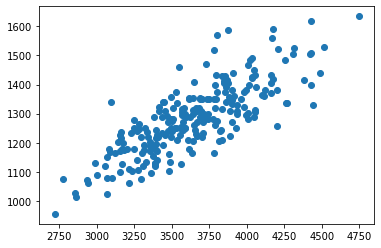

In [10]:
plt.scatter(X,Y)

In [ ]:
creating dummy test set

In [11]:
min_x = np.min(X)-100
max_x = np.max(X)+100

In [12]:
x = np.linspace(min_x,max_x,1000)

In [13]:
y = m*x+c

Text(0, 0.5, 'Brain weight in grams')

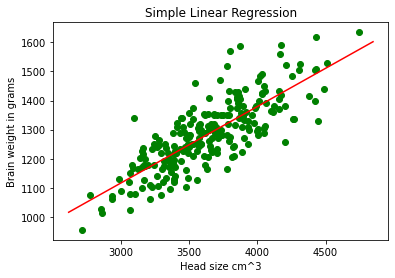

In [14]:
plt.scatter(X,Y,color='g')
plt.plot(x,y,color='r')
plt.title('Simple Linear Regression')
plt.xlabel('Head size cm^3')
plt.ylabel('Brain weight in grams')

In [15]:
# calbulator to error
sum_pred = 0
sum_act = 0

for i in range(n):
    y_pred = (m*X[i]+c)
    sum_pred += (Y[i]-y_pred)**2
    sum_act +=(Y[i]-mean_Y)**2

r2 = 1-(sum_pred/sum_act)
print(r2)

0.6393117199570003


Here we can observe that we got R**2> 0.5 . so we have good model

In [17]:
def predict(x):
    y = m*x + c
    print(y)

In [18]:
predict(4177)

1425.9177720966638


In [ ]:
# here we predict the brain wieght for given head size(cm^3)

# METHOD 2

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X  = X.reshape((n,1))

In [20]:
lg = LinearRegression()

In [21]:
lg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = lg.predict(X)

In [23]:
mse = mean_squared_error(Y,y_pred)

In [24]:
rmse = np.sqrt(mse)

In [25]:
r2_score = lg.score(X,Y)

In [ ]:
we got the same error R**2 value as above method-1

In [26]:
lg.predict([[4177]])

array([1425.9177721])

In [27]:
lg.intercept_

325.5734210494428